In [134]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [3]:
data_bf= pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
data_bf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
data_bf['MEDV'] = boston_dataset.target
data_bf.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [62]:
scaler = StandardScaler()
scaler.fit(data_bf.drop('MEDV',axis=1))
scaled_feature = scaler.transform(data_bf.drop('MEDV',axis=1))

In [63]:
data = pd.DataFrame(scaled_feature,columns= ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"])
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [64]:
data.insert(loc=0, column="1st", value=1)
data

,1st,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,1,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,1,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,1,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,1,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,1,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,1,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [65]:
X, X_test, y, y_test =train_test_split(data,
                                      data_bf['MEDV'],
                                      test_size=0.2,
                                      random_state=0)
X_train, X_CV, y_train, y_CV =train_test_split(X,y,
                                                test_size=0.25,
                                                random_state=0)

print(X_train.shape,X_test.shape,X_CV.shape)
#print(X.shape,X_test.shape)

(303, 14) (102, 14) (101, 14)


In [68]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
#y_train_predict=reg.predict(X_train)
y_pred=reg.predict(X_test)
root_mean_square_error= (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)

In [69]:
print('Coefficients: ', reg.coef_)
print('intercept: ',reg.intercept_) 
print('score: {}'.format(r2))
print('root mean square error: ',root_mean_square_error)



Coefficients:  [ 0.         -1.17113592  1.23172656 -0.35045534  0.53278503 -1.7050517
  2.3318986  -0.39258171 -3.39763264  2.52186483 -2.02185154 -1.82933767
  0.79118672 -3.98272132]
intercept:  22.319501511770454
score: 0.5976316598923077
root mean square error:  5.724004355597294


In [123]:
poly_features = PolynomialFeatures(degree=2)

X_train_2nd = poly_features.fit_transform(X_train)

reg.fit(X_train_2nd, y_train)
   
y_test_predicted = reg.predict(poly_features.fit_transform(X_test))


In [124]:
root_mean_square_error= (np.sqrt(mean_squared_error(y_test, y_test_predicted)))
r2 = r2_score(y_test, y_test_predicted)

In [125]:
print('Coefficients: ', reg.coef_)
print('intercept: ',reg.intercept_) 

print('score: {}'.format(r2))
print('root mean square error: ',root_mean_square_error)



Coefficients:  [-8.67434769e-12  1.56365342e+12 -6.53282675e+12 -2.21207667e+11
  2.67106773e+12 -6.29000761e+12 -3.91012719e+11 -4.57184455e+12
 -1.22469396e+12  9.42803343e+10  2.74509022e+11 -1.19922887e+12
  1.44751421e+12 -3.19056206e+12  1.49348553e+12  1.54150898e+12
  6.53282675e+12  2.21207667e+11 -2.67106773e+12  2.12009824e+11
  3.91012719e+11  4.57184455e+12  1.22469396e+12 -9.42803343e+10
 -2.74509022e+11  1.19922887e+12 -1.44751421e+12  3.19056206e+12
 -1.49348553e+12  8.54492188e-02  5.57594604e+01  3.27753906e+01
  2.58087158e+00  3.66821289e-01  1.29473877e+00  1.08776855e+00
 -6.61621094e-02  4.77521973e+01 -7.12634277e+01  7.37609863e+00
 -6.73217773e-01  1.95617676e+00 -7.00073242e-01 -7.28210449e-01
 -5.59082031e-01 -5.51351929e+00  7.23876953e-01  2.81616211e-01
  6.29272461e-02 -1.68774414e+00  3.29083252e+00 -7.74169922e-01
  5.42126465e+00 -3.23913574e-01  3.02062988e+00  8.40454102e-01
  1.36938477e+00  1.81915283e+00  1.48803711e-01  3.51037598e+00
 -4.295898

In [117]:
poly_features = PolynomialFeatures(degree=3)

X_train_3rd = poly_features.fit_transform(X_train)

reg.fit(X_train_3rd, y_train)
   
y_test_predicted = reg.predict(poly_features.fit_transform(X_test))


In [118]:
root_mean_square_error= (np.sqrt(mean_squared_error(y_test, y_test_predicted)))
r2 = r2_score(y_test, y_test_predicted)

In [119]:
print('Coefficients: ', reg.coef_)
print('intercept: ',reg.intercept_) 

print('score: {}'.format(r2))
print('root mean square error: ',root_mean_square_error)



Coefficients:  [-1.15663035e-12 -7.91484933e-13 -1.50852596e+00 -1.10595396e+00
  1.45988532e+00  1.10525515e-02  2.73637383e+00  2.01351355e-01
 -4.85509501e-01  3.63395142e-01  4.53817521e+00 -4.17548177e-01
 -6.47155778e-01  1.14533679e+00 -3.73978447e-01 -3.69482223e-13
 -1.50852596e+00 -1.10595396e+00  1.45988532e+00  1.10525515e-02
  2.73637383e+00  2.01351355e-01 -4.85509501e-01  3.63395142e-01
  4.53817521e+00 -4.17548177e-01 -6.47155778e-01  1.14533679e+00
 -3.73978447e-01  1.02639733e+00  6.31711632e-02  3.06538389e+00
  9.73515103e-01  4.97969372e+00 -5.21224580e+00 -2.45225482e+00
  1.15963701e+00  2.02973521e+00  3.46539060e+00  2.08614261e+00
  3.70161006e+00  4.25468684e+00  2.56630803e-01 -1.53632047e+00
  2.83548610e-01 -4.07661008e-01  4.49413106e+00  2.37090901e+00
  2.28517570e+00 -1.32759880e+00 -1.64449518e+00  1.41196913e+00
 -1.92258023e+00  1.08940393e+00 -1.52955006e+00 -2.68911611e-01
  1.43412876e+00 -6.69563753e-02  1.97853529e+00  6.92785098e-01
 -8.913448

In [120]:
poly_features = PolynomialFeatures(degree=4)

X_train_4th= poly_features.fit_transform(X_train)

reg.fit(X_train_4th, y_train)
   
y_test_predicted = reg.predict(poly_features.fit_transform(X_test))


In [121]:
root_mean_square_error= (np.sqrt(mean_squared_error(y_test, y_test_predicted)))
r2 = r2_score(y_test, y_test_predicted)

In [122]:
print('Coefficients: ', reg.coef_)
print('intercept: ',reg.intercept_) 

print('score: {}'.format(r2))
print('root mean square error: ',root_mean_square_error)

Coefficients:  [-6.12843110e-14 -1.67421632e-13 -1.86094645e-01 ...  2.74538848e-01
  3.63959899e-01 -3.24004231e-01]
intercept:  23.890460064565136
score: -123.64187235621785
root mean square error:  100.74419639720847


In [ ]:
#The highest score is in polynomial degree 2 and the least root mean square error
#We are going to apply regularization on it

In [130]:
#lambdas = [0,0.01,0.02,0.04,0.08,0.16,0.32,0.64]
lambdas = np.arange(1,10,step=0.1)
training_errors = [] 
CV_errors = [] 
for i in lambdas:
    clf = linear_model.Ridge (alpha = i,max_iter=1000)
    clf.fit(X_train_2nd, y_train)
#----------------------------------------------------------------------------------------------    
    training_predictions = clf.predict(X_train_2nd)
    training_mse = mean_squared_error(y_train, training_predictions)
    training_errors.append(training_mse)
#------------------------------------------------------------------------------------------------
    #CV_predictions = clf.predict(X_CV)
    CV_mse =  (-1*cross_val_score(clf,X,y,scoring = 'neg_mean_squared_error', cv=4)).mean()
    #CV_mse = mean_squared_error(y_CV, CV_predictions)
    CV_errors.append(CV_mse)
#print("training errors: ",training_errors)
print("---------------------------------------------------------------------------------------------------")
#print("testing errors: ", testing_errors)

---------------------------------------------------------------------------------------------------


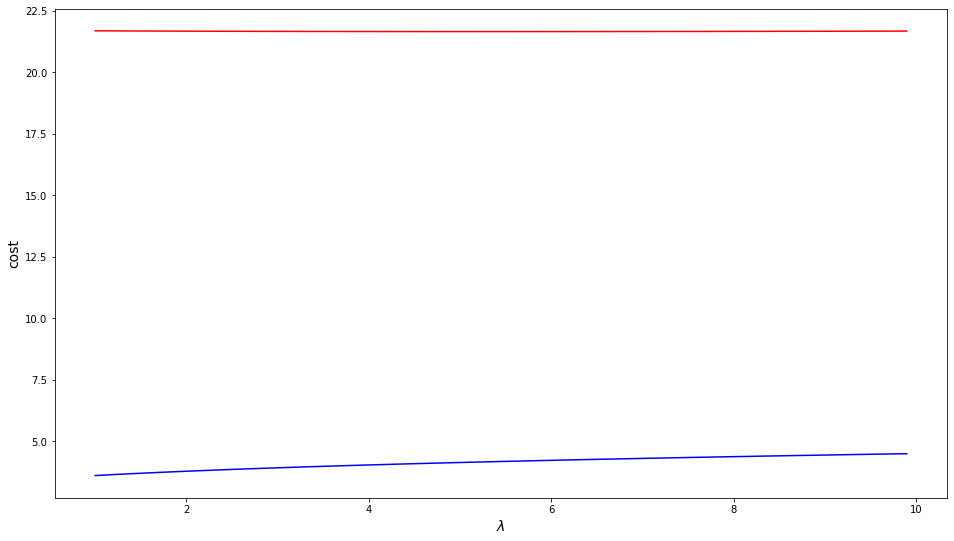

In [131]:
plt.figure(figsize=(16, 9))
plt.plot(lambdas, training_errors, label="train",color='blue')#bluee
plt.plot(lambdas, CV_errors, label="test",color='red')#redd
plt.xlabel("$\\lambda$", fontsize=14)
plt.ylabel("cost", fontsize=14)

plt.show()

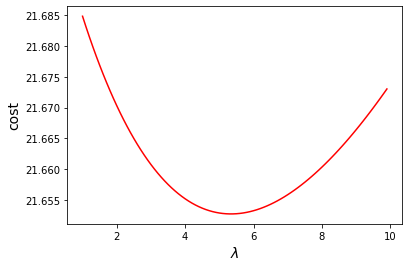

In [132]:
plt.figure()
plt.plot(lambdas, CV_errors, label="test",color='red')#redd
plt.xlabel("$\\lambda$", fontsize=14)
plt.ylabel("cost", fontsize=14)

plt.show()

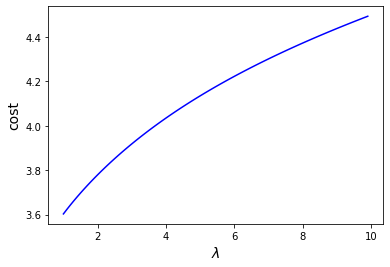

In [133]:
plt.figure()
plt.plot(lambdas, training_errors, label="train",color='blue')
plt.xlabel("$\\lambda$", fontsize=14)
plt.ylabel("cost", fontsize=14)
plt.show()

In [ ]:
#The best lambda is equal to 5